# PA 006 - Bank Marketing Strategy

# Planejamento da Solução ( IOT )

## Input 

Você foi contratado como um cientista de dados consultor, para criar um produto de dados que cria uma segmentação de clientes que direcionará a estratégia de marketing e os resultados esperados do seu trabalho de consultoria, são os seguintes:

1. Criar uma segmentação de clientes baseado em critérios claros de seleção.
2. Tornar a segmentação de clientes acessível para o time de operações.
3. Ensinar o time de operações sobre como usar a sua solução.
4. Transferir o conhecimento para os Cientistas de Dados da International Bank.
5. Recomendar 2-3 alavancas de negócio para cada segmento de clientes.

## Output 

- Ferramentas:
    - Metabase
    - Streamlit
    
- URL para o time de operação testar
- Download dos dados selecionados

## Tasks 

- Descrição dos dados
    - Substituição de NA's.
    
- EDA
    - Análise Univariada 
    - Análise Bivariada
    - Detecação de outliers
    - Seleção de Features
    - Estudo do Espaço
    - Definição do Embedding
    
- Treinamento dos algoritmos de ML.
    - Análise de Performance.
    - Análise de Clustering.
    - Definição dos número de clustering.
    
- EDA - Insights.
    - Explicação das características dos segmentos.
    
- Tabela para armazenar os clientes clusterizados.

- Criação do notebook de produção

- Arquitetura da AWS.
    - S3 para armazenar os dados
    - EC2 para armazenar o ETL e a ferramenta de visualização.
    - DB para armazenar a tabela
    - Cronjob
    - Papermill

# 0.0. Imports

In [73]:
import pandas as pd

import seaborn as sns
from sklearn import cluster as c
from sklearn import metrics as m

from matplotlib import pyplot as plt

## 0.1. Loading data

In [7]:
df_raw = pd.read_csv( '../data/raw/cc_general.csv' )

# 1.0. Data Description

In [10]:
df01 = df_raw.copy()

## 1.1. Columns Rename

In [41]:
df01.columns = df01.columns.str.lower()

## 1.2. Data Dimensions

In [43]:
print( 'Number of rows: {}'.format( df01.shape[0] ) )
print( 'Number of cols: {}'.format( df01.shape[1] ) )

Number of rows: 8950
Number of cols: 18


## 1.3. Data Types

In [44]:
df01.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

## 1.4. Check Missing Values

In [48]:
df01.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [49]:
df01.isna().sum() / df01.shape[0]

cust_id                             0.000000
balance                             0.000000
balance_frequency                   0.000000
purchases                           0.000000
oneoff_purchases                    0.000000
installments_purchases              0.000000
cash_advance                        0.000000
purchases_frequency                 0.000000
oneoff_purchases_frequency          0.000000
purchases_installments_frequency    0.000000
cash_advance_frequency              0.000000
cash_advance_trx                    0.000000
purchases_trx                       0.000000
credit_limit                        0.000112
payments                            0.000000
minimum_payments                    0.034972
prc_full_payment                    0.000000
tenure                              0.000000
dtype: float64

## 1.5. Replace Missing Values

In [50]:
df01 = df01.dropna()

In [51]:
df01.isna().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

# 2.0. Data Filtering

# 3.0. Feature Engineering

# 4.0. EDA - Space Study

# 5.0. Data preparation

# 6.0. Feature Selection

In [78]:
cols_drop = ['cust_id']
X = df01.drop( columns=cols_drop )

# 7.0. Hiperparmeter Fine Tuning

## 7.1. K-Means

In [67]:
clusters = [ 2, 3, 4, 5, 6, 7, 8]

silhouette_list = []
davies_list = []
for k in clusters:
    # model definition
    kmeans_model = c.KMeans( n_clusters=k )
    
    # model training
    kmeans_model.fit( X )
    
    # model predict
    labels = kmeans_model.predict( X )
    
    # model performance
    sil  = m.silhouette_score( X, labels )
    dav  =  m.davies_bouldin_score( X, labels )
    
    silhouette_list.append( sil )
    davies_list.append( dav )

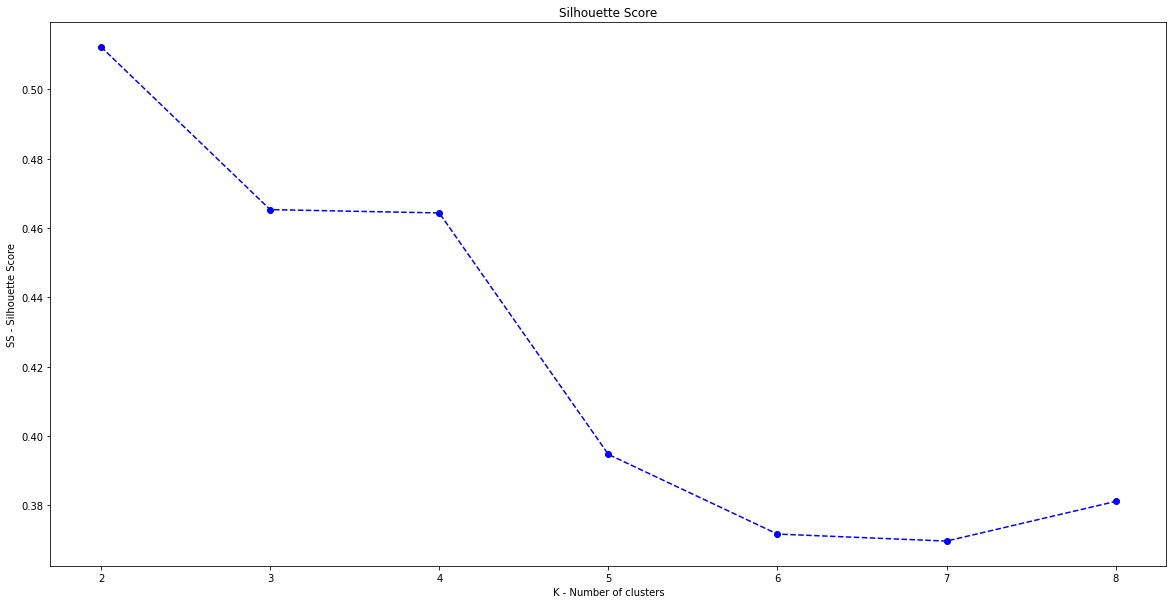

In [65]:
plt.figure( figsize=(20, 10))
plt.plot( clusters, silhouette_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K - Number of clusters' )
plt.ylabel( 'SS - Silhouette Score' )
plt.title( 'Silhouette Score' );

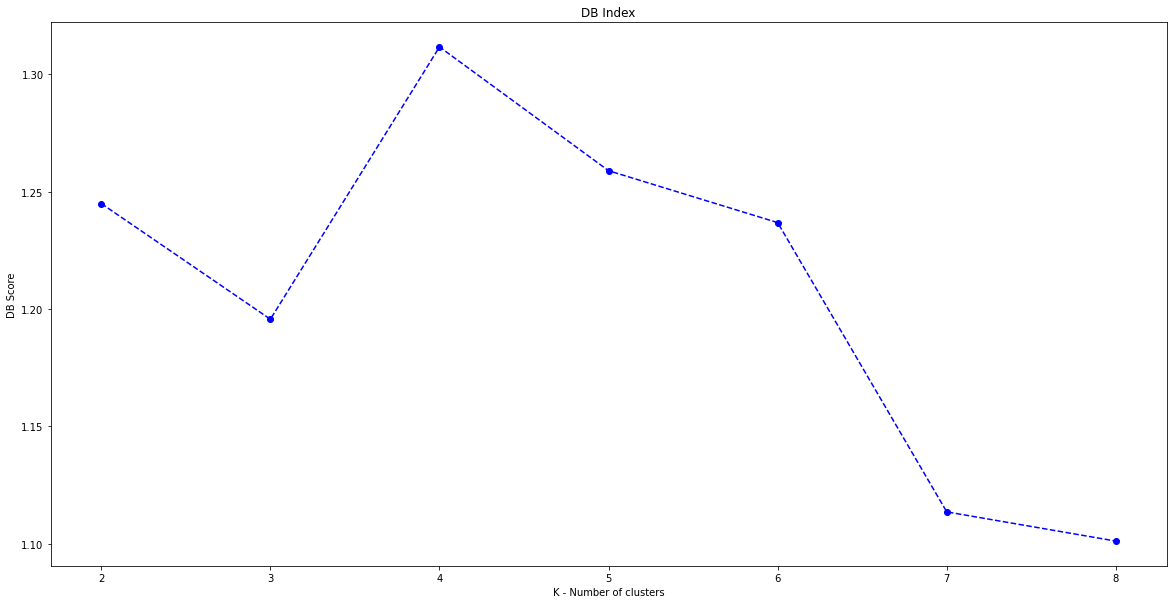

In [69]:
plt.figure( figsize=(20, 10))
plt.plot( clusters, davies_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K - Number of clusters' )
plt.ylabel( 'DB Score' )
plt.title( 'DB Index' );

# 8.0. Machine Learning Traning

# 9.0. Clustering Analysis

# 10.0. EDA - Insight Reports

# 11.0. Deploy To Production